In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
from skimage import io
import cv2

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17, 6)

%matplotlib inline

## seaborn
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

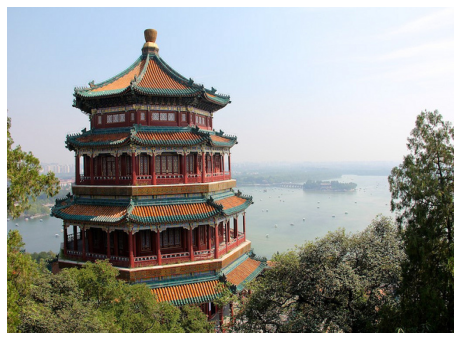

In [2]:
Img = load_sample_image('china.jpg')
fig, ax = plt.subplots(1, 1 , figsize = (8, 6))
font = FontProperties()
font.set_weight('bold')
_ = ax.imshow(Img)
_ = ax.axis('off')
_ = ax.set_aspect('auto')

# Geometric Transformations

## Resize
[resizing](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#cv2.resize):an image.

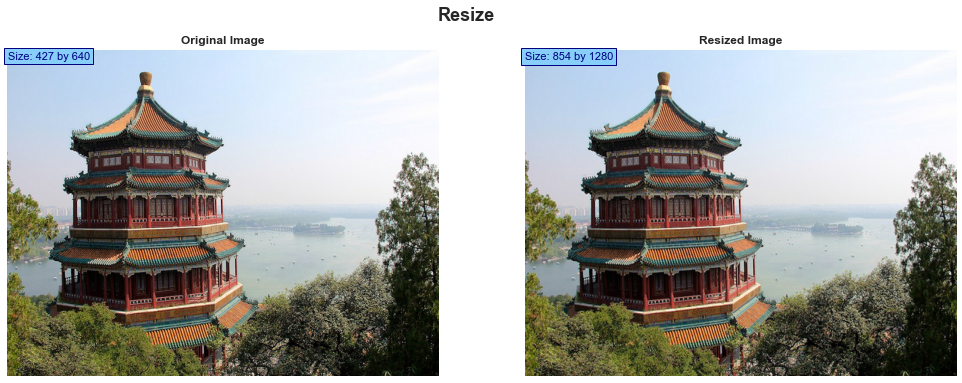

In [3]:
Out = cv2.resize(Img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle('Resize', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Resized Image', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

## Image Wrap
Calculates a Applies an [affine transformation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=warpaffine#warpaffine) to an image.

$$
\begin{bmatrix}
x'_i \\ y'_i \end{bmatrix} = 
\begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \end{bmatrix}\begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}
$$

We can define a map function as follows
$$
\text{map_matrix}(t_x, t_y) = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}
$$

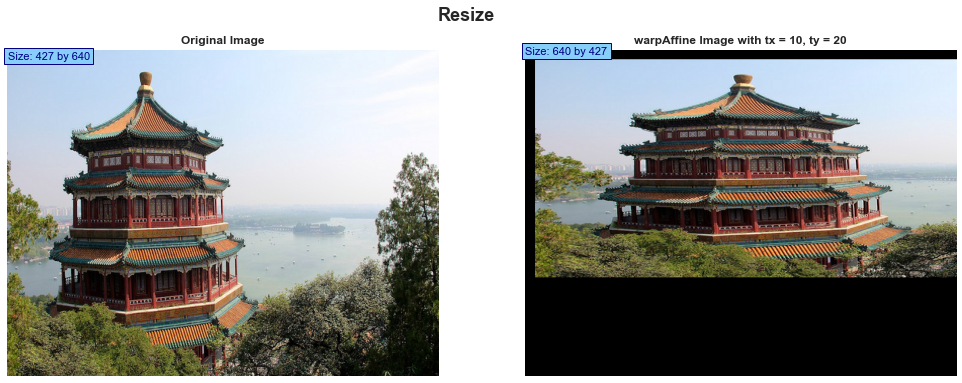

In [4]:
def map_matrix(tx, ty):
    M = np.eye(3, dtype=float)[:2,:]
    M[:,-1] = [tx, ty]
    return M

Out = cv2.warpAffine(Img, map_matrix(10,20) , Img.shape[:2])

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle('Resize', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image with tx = 10, ty = 20', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

## Warp Perspective

Applies a [perspective transformation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=warpaffine#warpperspective) to an image.

Consider a matrix of a perspective transform

$$M = \begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \\M_{31} & M_{32} & M_{33} \end{bmatrix}$$

then
$$
\begin{bmatrix}
x'_i \\ y'_i \end{bmatrix} = 
\begin{bmatrix} \dfrac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}}
\\\dfrac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}}
\end{bmatrix}
$$

also [getPerspectiveTransform](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=getperspectivetransform#getperspectivetransform) calculates a perspective transform from four pairs of the corresponding points.

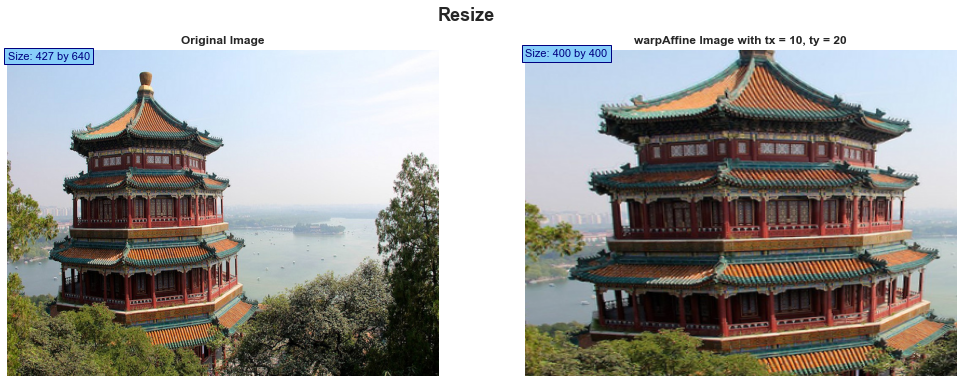

In [5]:
pts1 = np.float32([[50,60],[350, 50],[20, 380],[380, 400]])
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])

M = cv2.getPerspectiveTransform(pts1,pts2)
Out = cv2.warpPerspective(Img,M, (400,400))

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle('Resize', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image with tx = 10, ty = 20', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
***